In [1]:
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
import os, re
from autosmt_utils import getND2bounds
from autosmt_utils import getAllIntensities
from autosmt_utils import get_gv_framenum

In [2]:
intdf = getAllIntensities('../spt/','out.mat')

In [17]:
# calculate intensity due to green and violet pulses
config = {'illumination_sequence':{'ncycles':5,'r':30,'v':0,'g':0,'framewindow':30,'gfirst':False}}
gvframes = get_gv_framenum(config)

vpre = gvframes['vpre']
vpost = gvframes['vpost']
gpre = gvframes['gpre']
gpost = gvframes['gpost']

intdf['vpre_int'] = intdf['intensities'].apply(lambda x: x[vpre].sum())
intdf['vpost_int'] = intdf['intensities'].apply(lambda x: x[vpost].sum())
intdf['gpre_int'] = intdf['intensities'].apply(lambda x: x[gpre].sum())
intdf['gpost_int'] = intdf['intensities'].apply(lambda x: x[gpost].sum())
intdf['vdelta'] = intdf['vpost_int'] - intdf['vpre_int']
intdf['gdelta'] = intdf['gpost_int'] - intdf['gpre_int']

intdf.to_csv('cell_intensities_by_frame.csv')

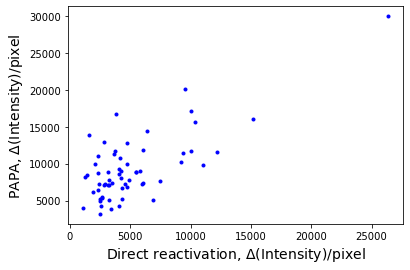

In [9]:
# For "category 1" cells (selected cells in binary classification), plot intensity change with green and violet
cat1 = intdf[intdf['category']==1]
plt.plot(cat1['vdelta'].to_numpy()/cat1['masksize'].to_numpy(),cat1['gdelta'].to_numpy()/cat1['masksize'].to_numpy(),'b.')
plt.xlabel('Direct reactivation, $\Delta$(Intensity)/pixel',fontsize=14)
plt.ylabel('PAPA, $\Delta$(Intensity)/pixel',fontsize=14);

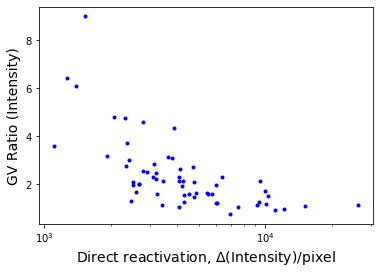

In [11]:
# Plot GV ratio as a function of violet reactivation normalized to ROI area in pixels (a proxy for receiver concentration)
cat1 = intdf[intdf['category']==1]
plt.semilogx(cat1['vdelta'].to_numpy()/cat1['masksize'].to_numpy(),cat1['gdelta'].to_numpy()/cat1['vdelta'].to_numpy(),'b.')
plt.xlabel('Direct reactivation, $\Delta$(Intensity)/pixel',fontsize=14)
plt.ylabel('GV Ratio (Intensity)',fontsize=14);

In [6]:
# Calculate Spearman correlation between direct reactivation per pixel (proxy for concentration) and GV ratio
spearmanr(cat1['vdelta']/cat1['masksize'],cat1['gdelta']/cat1['vdelta'])

SpearmanrResult(correlation=-0.7335272342675832, pvalue=1.7723649067651985e-11)